# Differential Abundance plots. 
  
In this template, we look at how to create differential abundance plots using the `seaborn` package in python. This is useful for visualizing differences in abundance of features.
between different groups or conditions in your data. A typical output could be the results data.frame from `DESeq2` or `edgeR` analyses, which contains log fold changes and p-values for each feature.  
  
In this case, we use the output from DESeq2 directly.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Read data. 
  
Here we read in the resuts data frame coming from a DESeq2 analysis. we can create a volcano plot to visualize the results.

In [35]:
dds_results = pd.read_csv('data/pasilla_deseq_results.csv')

dds_results.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,FBgn0000008,95.139884,-0.040729,0.219875,-0.185237,0.853043,0.950602
1,FBgn0000017,4352.330929,-0.256242,0.112259,-2.282585,0.022455,0.131306
2,FBgn0000018,418.586059,-0.064800,0.131322,-0.493442,0.621700,0.860997
3,FBgn0000024,6.405811,0.308605,0.755108,0.408690,0.682767,0.889355
4,FBgn0000032,989.661627,-0.048568,0.120861,-0.401848,0.687796,0.891345


## Volcano plot. 
  
A volcano plot displays the log fold change on the x-axis and the negative log10 p-value on the y-axis. In this way, we can easily see which features (in this case, genes) are significantly differentially expressed. Whenever you have a p-value and a log fold change, you can create a volcano plot.

In [36]:
# Create a column for the -log10 p-value

dds_results["-Log10PValue"] = -np.log10(dds_results["padj"])

dds_results["Log2FoldChange"] = dds_results["log2FoldChange"].astype(float)

Text(0, 0.5, '-$\\text{log}_{10}$ adj. p-value')

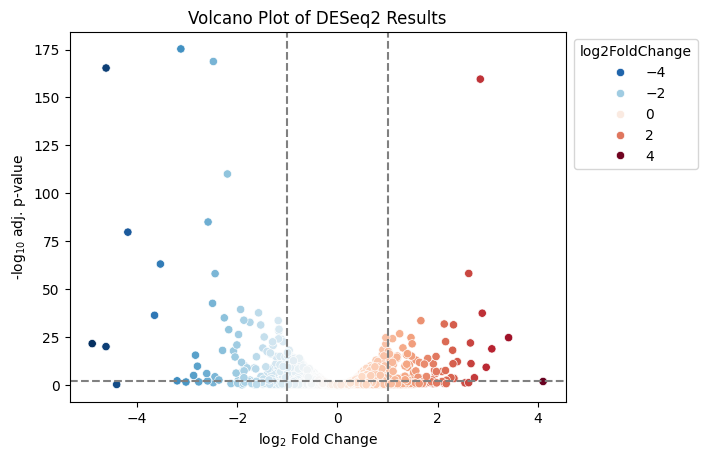

In [37]:
## Create a volcano plot

ax = sns.scatterplot(data=dds_results,
                x="log2FoldChange",
                y="-Log10PValue",
                hue="log2FoldChange",
                palette="RdBu_r")

# Move the legend to the upper right corner
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.28, 1))

# Add vertical and horizontal lines for significance thresholds

plt.axhline(y=-np.log10(0.01), color='grey', linestyle='--') # Horizontal line for p-value threshold
plt.axvline(x=1, color='grey', linestyle='--') # Vertical line for log2 fold change threshold
plt.axvline(x=-1, color='grey', linestyle='--')

plt.title("Volcano Plot of DESeq2 Results")
plt.xlabel("$\\text{log}_{2}$ Fold Change")
plt.ylabel("-$\\text{log}_{10}$ adj. p-value")

This is a standard Volcano plot that aids visualization of the differential abundance resutls. One can customize the plot further by adding labels, changing colors, or adjusting the theme. One typical addition is to add the significant features to the plot. In this case, we
can look at the top 10 most significant features and label them in the plot.

In [38]:
# Gather the top 10 most significant genes
top_genes = dds_results.nlargest(10, '-Log10PValue')

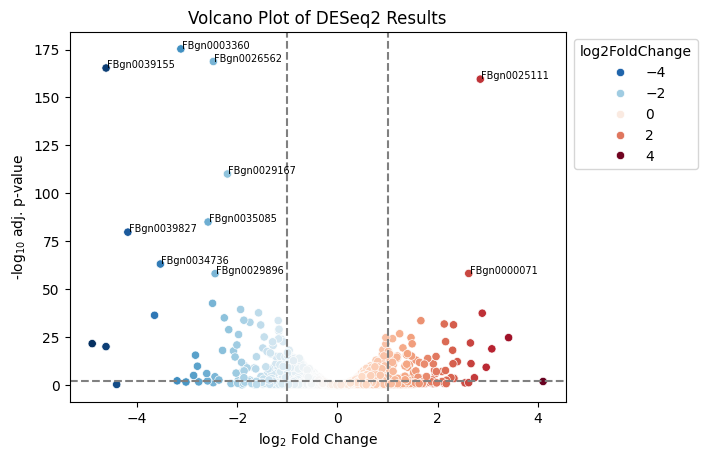

In [39]:
## Create a volcano plot

ax = sns.scatterplot(data=dds_results,
                x="log2FoldChange",
                y="-Log10PValue",
                hue="log2FoldChange",
                palette="RdBu_r")

# Move the legend to the upper right corner
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.28, 1))

# Add vertical and horizontal lines for significance thresholds

plt.axhline(y=-np.log10(0.01), color='grey', linestyle='--') # Horizontal line for p-value threshold
plt.axvline(x=1, color='grey', linestyle='--') # Vertical line for log2 fold change threshold
plt.axvline(x=-1, color='grey', linestyle='--')

plt.title("Volcano Plot of DESeq2 Results")
plt.xlabel("$\\text{log}_{2}$ Fold Change")
plt.ylabel("-$\\text{log}_{10}$ adj. p-value")


# Add labels for the top 10 most significant genes
for i, point in top_genes.iterrows():
    ax.text(point['log2FoldChange'] + 0.02, point['-Log10PValue'], point['gene'], fontsize=7)


# Save the plot as pdf file
plt.savefig("figures/volcano_plot_python.pdf", bbox_inches='tight', dpi=300)
plt.savefig("figures/volcano_plot_python.png", bbox_inches='tight', dpi=300)

This plot now includes labels for the top 10 most significant features, making it easier to identify them in the context of the overall results. This pretty much ready for custom modifications and can be used as a template for creating differential abundance plots in your own analyses. 